In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow
import librosa.display

In [2]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 214.3/214.3 kB 47.3 kB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=da3bb58ad6d32c15b425906831a1d62c9ce3d2b8705da9ee9fcd64475ef73793
  Stored in directory: c:\users\bravi\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


In [8]:
import librosa
audio_file_path="C:\\Users\\ril\\Downloads\\ch_005.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
#mfccs=mfccs.T
print(mfccs.shape)

(40, 127)


In [3]:
import numpy as np
dataset = []
cla=[]
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'C:\\Users\\bravi\\Downloads\\genres_original\\{genre}'):
        songname = f'C:\\Users\\bravi\\Downloads\\genres_original\\{genre}\\{filename}'
        for index in range(14):
            audio, sr = librosa.load(songname,res_type='kaiser_test')
            mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
            
            fea_class=genre
            dataset.append(mfcc_fea)
            cla.append(fea_class)

In [4]:
d = {'Features':dataset,'class':cla}

In [5]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
2,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
3,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
4,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues


In [6]:
X=np.array(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
X_train.shape

(11177, 40)

In [10]:
X_test.shape

(2795, 40)

In [11]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4))
X_test=np.reshape(X_test,(X_test.shape[0],10,4))

In [12]:
X_train.shape

(11177, 10, 4)

In [13]:
import keras

In [14]:
input_shape=(10,4)

In [15]:
model = keras.Sequential()

    # 2 LSTM layers
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

    # dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

    # output layer
model.add(keras.layers.Dense(10, activation='softmax'))
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [16]:
progression = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40)

Epoch 1/40
350/350 [==============================] - 6s 9ms/step - loss: 2.1092 - acc: 0.2493 - val_loss: 1.8266 - val_acc: 0.3925
Epoch 2/40
350/350 [==============================] - 2s 7ms/step - loss: 1.6763 - acc: 0.4193 - val_loss: 1.4695 - val_acc: 0.5166
Epoch 3/40
350/350 [==============================] - 2s 7ms/step - loss: 1.4325 - acc: 0.5007 - val_loss: 1.2612 - val_acc: 0.5889
Epoch 4/40
350/350 [==============================] - 2s 7ms/step - loss: 1.2732 - acc: 0.5657 - val_loss: 1.1144 - val_acc: 0.6551
Epoch 5/40
350/350 [==============================] - 2s 7ms/step - loss: 1.1453 - acc: 0.6129 - val_loss: 0.9975 - val_acc: 0.6859
Epoch 6/40
350/350 [==============================] - 2s 7ms/step - loss: 1.0434 - acc: 0.6546 - val_loss: 0.9080 - val_acc: 0.7127
Epoch 7/40
350/350 [==============================] - 2s 7ms/step - loss: 0.9464 - acc: 0.6890 - val_loss: 0.8151 - val_acc: 0.7478
Epoch 8/40
350/350 [==============================] - 3s 8ms/step - loss: 0.

In [17]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9982110857963562


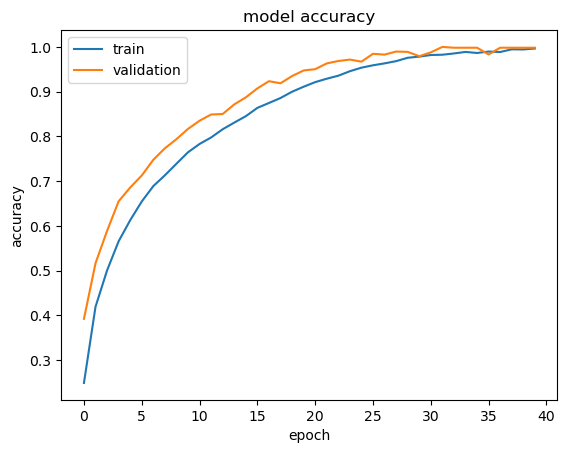

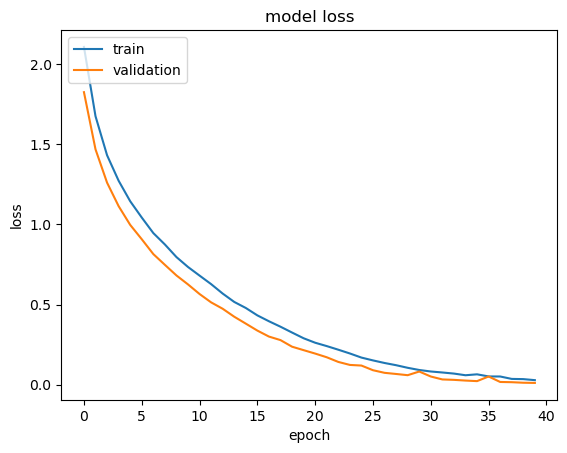

In [18]:
import matplotlib.pyplot as plt
plt.plot(progression.history['acc'])
plt.plot(progression.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(progression.history['loss'])
plt.plot(progression.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
y_pred=model.predict(X_test)

88/88 [==============================] - 1s 2ms/step


In [20]:
round_off=np.round_(y_pred)

In [21]:
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[267   0   0   0   0   0   0   0   0   0]
 [  0 253   0   0   0   0   0   0   0   0]
 [  0   0 290   0   0   0   0   0   0   0]
 [  0   0   0 275   0   0   0   0   0   0]
 [  0   0   0   0 280   0   0   0   0   0]
 [  0   0   0   0   0 290   0   0   0   0]
 [  0   0   0   0   0   0 280   0   0   5]
 [  0   0   0   0   0   0   0 288   0   0]
 [  0   0   0   0   0   0   0   0 281   0]
 [  0   0   0   0   0   0   0   0   0 286]]


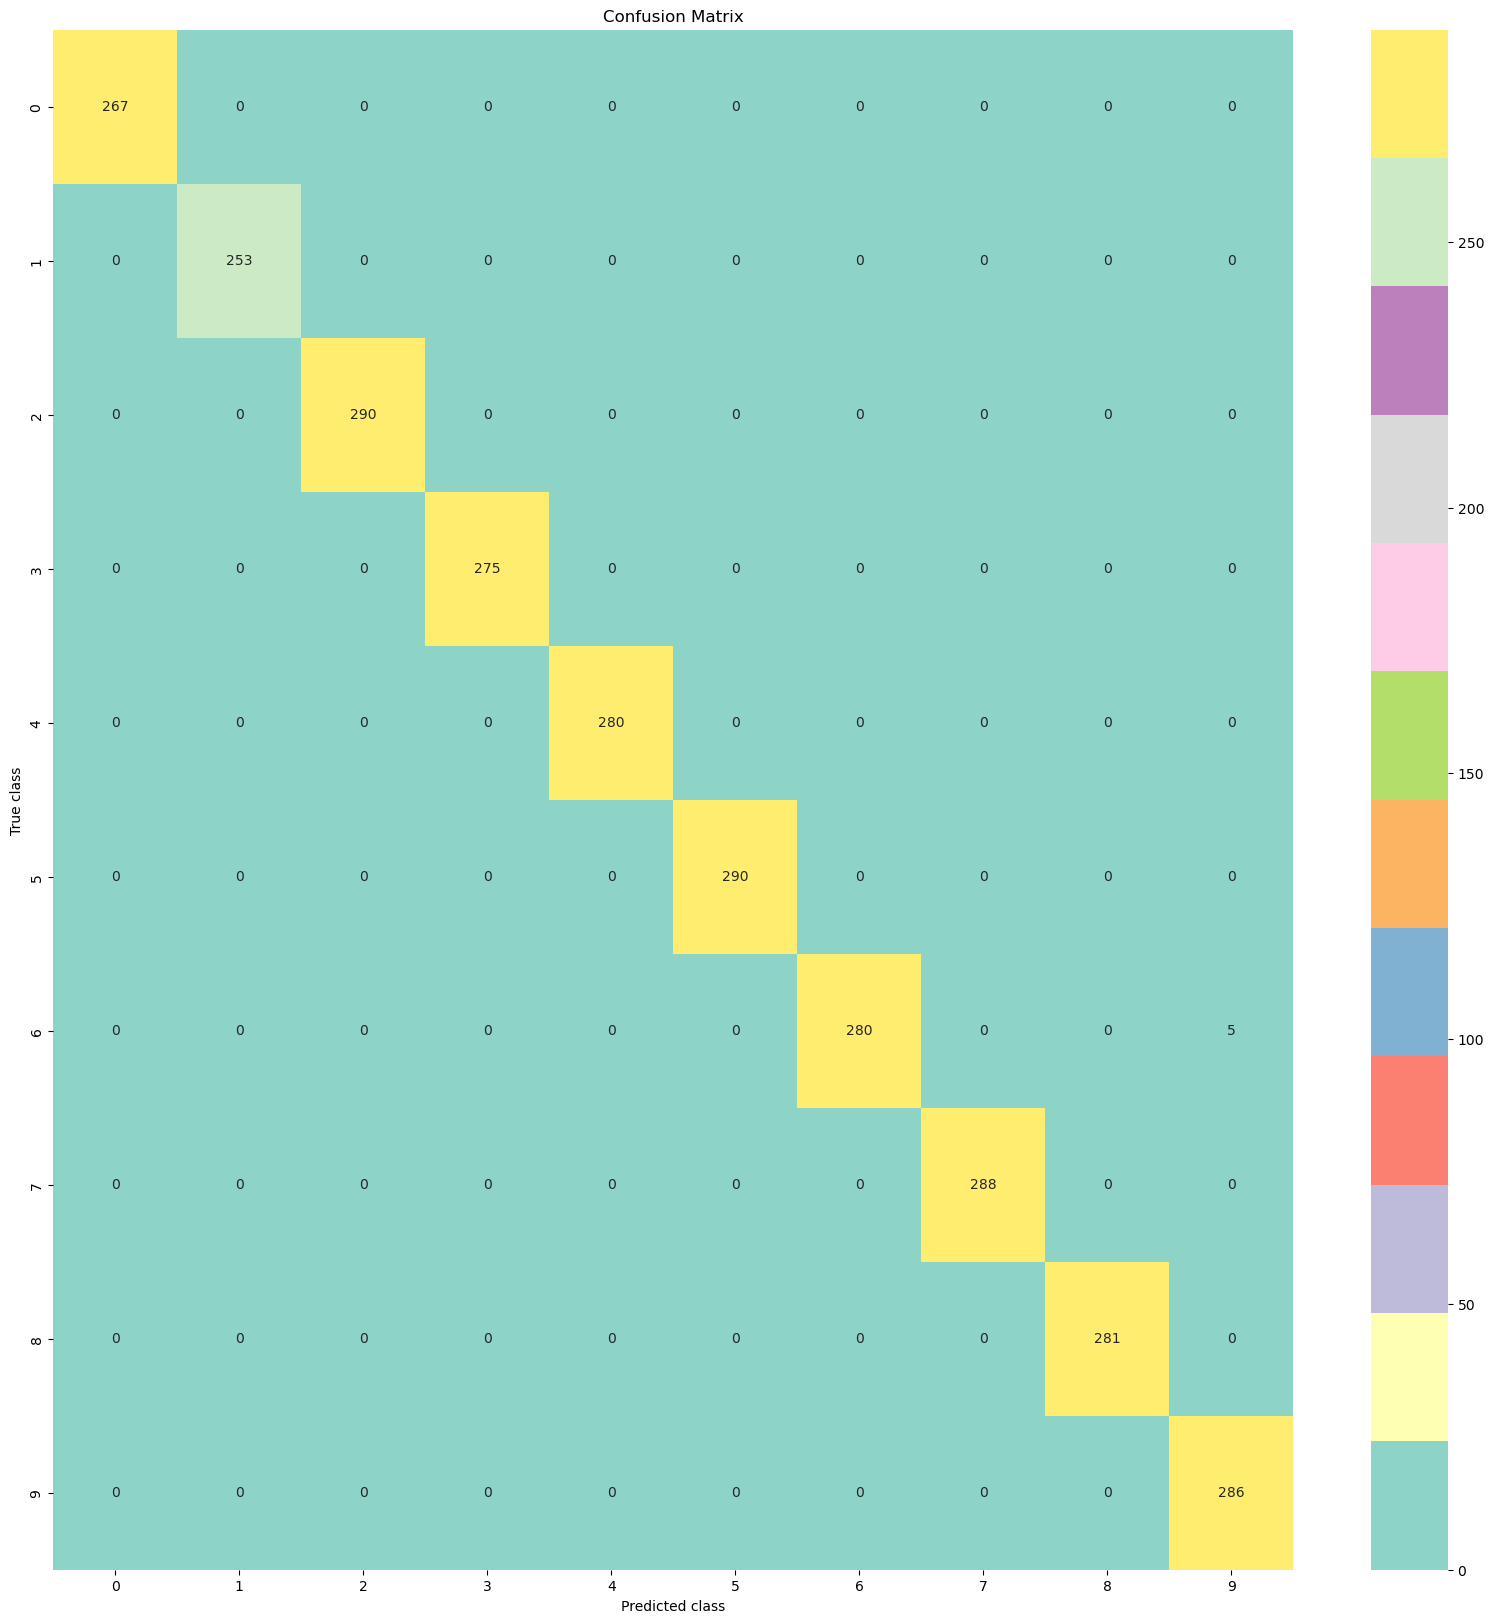

In [22]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [24]:
mydict = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
import librosa
audio_file_path="C:\\Users\\bravi\\Downloads\\genres_original\\pop\\pop.00009.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 0s 16ms/step
pop


In [73]:
model.save("lstm.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

# equivalent to: model.save("model.h5")
#from tensorflow.keras.models import save_model
#save_model(model, "model.h5")

In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))